In [58]:
import pandas as pd 
import numpy as np 

In [59]:
dataset=pd.read_csv(r'C:\Users\91950\Desktop\ml\flightdata.csv')
#using read_csv we are can able to read the dataset

In [60]:
dataset.head()
#head refers to first five rows of the dataset

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,2143,2102.0,-41.0,0.0,0,0,338,295.0,2182
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,1435,1439.0,4.0,0.0,0,0,110,115.0,528
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,1215,1142.0,-33.0,0.0,0,0,335,300.0,2182
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,1335,1345.0,10.0,0.0,0,0,196,205.0,1399
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,607,615.0,8.0,0.0,0,0,247,259.0,1927


In [61]:
dataset.isnull().sum()
# we are print the sum of null values in the columns

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [62]:
dataset['DEST'].unique()
#unique values in DEST column

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [63]:
import seaborn as sns # used for visiualization
%matplotlib inline

<AxesSubplot:xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

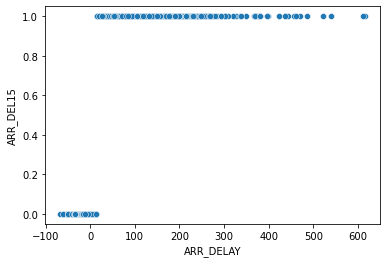

In [64]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=dataset)


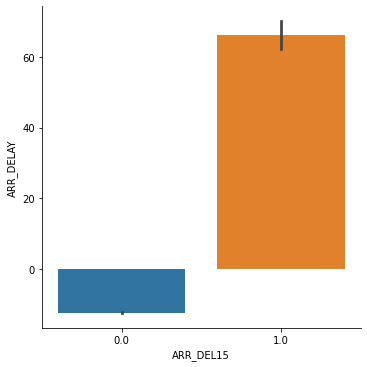

In [65]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=dataset)

<AxesSubplot:>

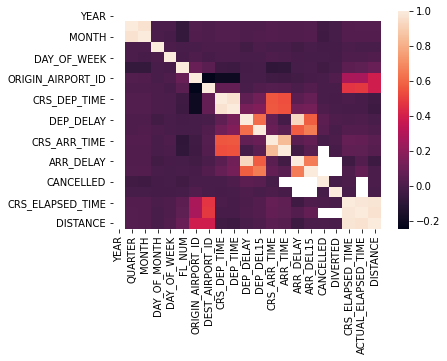

In [66]:
sns.heatmap(dataset.corr())
# it shows the inter relationship between the numerical columns

In [67]:
#filter the dataset to eliminate columns that aren't relevant to a predictive model.
dataset = dataset[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME","DEP_DEL15", "ARR_DEL15"]]
dataset.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [68]:
dataset[dataset.isnull().any(axis=1)].head(10)
#we are print only the null values rows

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,NaN
179,86,1,10,7,MSP,DTW,1632,NaN,NaN
184,557,1,10,7,MSP,DTW,912,0.0,NaN
210,1096,1,10,7,DTW,MSP,1303,NaN,NaN
478,1542,1,22,5,SEA,JFK,723,NaN,NaN
481,1795,1,22,5,ATL,JFK,2014,NaN,NaN
491,2312,1,22,5,MSP,JFK,2149,NaN,NaN
499,423,1,23,6,JFK,ATL,1600,NaN,NaN
500,425,1,23,6,JFK,ATL,1827,NaN,NaN
501,427,1,23,6,JFK,SEA,1053,NaN,NaN


In [69]:
dataset['DEP_DEL15'].mode()

0    0.0
dtype: float64

In [70]:
#replace the missing values with 1s.
dataset = dataset.fillna({'ARR_DEL15': 1})
dataset = dataset.fillna({'DEP_DEL15': 0})
dataset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [71]:
import math

for index, row in dataset.iterrows():
    dataset.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
    # we are reducing the values of the CRS_ARR_TIME by floor division
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [72]:
from sklearn.preprocessing import LabelEncoder
# it is used to change the string values into numerical values
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset['ORIGIN'])

In [73]:
dataset.head(5)
# After using labelEncoder , printing the first 5 values

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [74]:
dataset['ORIGIN'].unique()
# This is the numerical unique values after using labelEncoder

array([0, 1, 4, 3, 2])

In [75]:
x = dataset.iloc[:, 0:8].values
# x is independent values
y = dataset.iloc[:, 8:9].values
# y is dependent values

In [76]:
x # printing x values 

array([[1.399e+03, 1.000e+00, 1.000e+00, ..., 4.000e+00, 2.100e+01,
        0.000e+00],
       [1.476e+03, 1.000e+00, 1.000e+00, ..., 3.000e+00, 1.400e+01,
        0.000e+00],
       [1.597e+03, 1.000e+00, 1.000e+00, ..., 4.000e+00, 1.200e+01,
        0.000e+00],
       ...,
       [1.823e+03, 1.200e+01, 3.000e+01, ..., 4.000e+00, 2.200e+01,
        0.000e+00],
       [1.901e+03, 1.200e+01, 3.000e+01, ..., 4.000e+00, 1.800e+01,
        0.000e+00],
       [2.005e+03, 1.200e+01, 3.000e+01, ..., 1.000e+00, 9.000e+00,
        0.000e+00]])

In [77]:
y # printing y values

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [78]:
x.shape
# shape of x

(11231, 8)

In [79]:
y.shape
# sahpe of y

(11231, 1)

In [80]:
from sklearn.preprocessing import OneHotEncoder
# After using LabelEncoder the numerical values cannot able to understand what is 0 and 1 
# so we are using OneHotEncoder to one column values into different column values
oh = OneHotEncoder()
z=oh.fit_transform(x[:,4:5]).toarray() # column ORIGIN
t=oh.fit_transform(x[:,5:6]).toarray() # column DEST

In [81]:
z
# this is column ORIGIN and doing OneHotEncoder

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [82]:
t
# this is column DEST and doing OneHotEncoder

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [83]:
x=np.delete(x,[4,5],axis=1) 
# we are deleting the ORIGIN and DEST in the dataset

In [84]:
x.shape
# shape after deleteing the 2 columns

(11231, 6)

In [85]:
x=np.concatenate((t,z,x),axis = 1)
# we are concatenating the new origin and dest in the dataset

In [86]:
x.shape
# this is the present shape of x

(11231, 16)

In [87]:
from sklearn.model_selection import train_test_split
# it is used to split the dataaset for train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [88]:
print(x_test.shape) 
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(2247, 16)
(8984, 16)
(2247, 1)
(8984, 1)


In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [90]:
from sklearn.tree import DecisionTreeClassifier
# model
classifier = DecisionTreeClassifier(criterion='entropy',random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [91]:
decisiontree = classifier.predict(x_test)
# predicting the outcome using the x_test
decisiontree

array([1., 0., 0., ..., 0., 0., 0.])

In [92]:
from sklearn.metrics import accuracy_score
desacc = accuracy_score(y_test,decisiontree)
# to find the accuracy of the predicited values
desacc

0.8682688028482421

In [93]:
from sklearn.metrics import confusion_matrix
# shows the predicited values in matrix format tt tf ft ff
cm = confusion_matrix(y_test,decisiontree)
cm

array([[1780,  156],
       [ 140,  171]], dtype=int64)

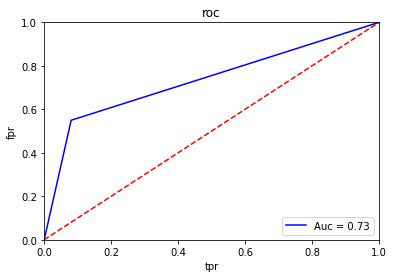

In [98]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr1,tpr1,'b',label = 'Auc = %0.2f'% roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [99]:
import pickle
pickle.dump(classifier,open('flight.pkl','wb'))